# One-to-Many case

Take Jaynes-Cummings model as an example. The master equation is given by
$$\dot{\rho}=-i[H,\rho]+\kappa\mathcal{D}[a]\rho+\gamma\mathcal{D}[\sigma]\rho,$$
where $H = \omega_c a^\dagger a + \omega_e \sigma^\dagger \sigma+g(a^\dagger\sigma+\sigma^\dagger a)$.

In [ ]:
import sys, os
sys.path.append(os.path.abspath(r'..'))
from main.Qcs import qcs

In [1]:
import qutip as qt
import numpy as np
# %matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# system parameters
ωc = 0
ωe = 0
κ = 1
g = κ
γ = 0.1 * κ

In [3]:
# construct effective Hamiltonian
Heff = []
Heff.append([ωc-1j*κ/2, ("ad",0), ("a",0)])
Heff.append([ωe-1j*γ/2, ("sp",0), ("sm",0)])
Heff.append([g, ("ad",0), ("sm",0)])
Heff.append([g, ("a",0), ("sp",0)])

## The different input and output channels

### Calculate 2nd-order and 3rd-order equal-time cross-correlation function
$$g^{(2)}_c(0)=\frac{\langle a^\dagger\sigma^\dagger a\sigma\rangle_{\text{ss}}}{\langle a^\dagger a\rangle_{\text{ss}}\langle \sigma^\dagger\sigma\rangle_{\text{ss}}},g^{(3)}_c(0)=\frac{\langle a^{\dagger 2}\sigma^\dagger a^2\sigma\rangle_{\text{ss}}}{\langle a^\dagger a\rangle_{\text{ss}}^2\langle \sigma^\dagger\sigma\rangle_{\text{ss}}}$$

In [5]:
mode_c = [np.sqrt(κ/2), ("a", 0)]
mode_e = [np.sqrt(γ/2), ("sm", 0)]

Output_c = qcs.Output_channel("c1", mode_c)
Output_e = qcs.Output_channel("c2", mode_e)
Output = [Output_c, Output_e]

### 1.The cavity-driven case:
$$H_{d}^{(c)} = \Omega_c(a e^{it\omega_{dc}}+\text{h.c.}) $$

In [6]:
ω_dc = np.linspace(-4, 4, 4000)
Input_c = qcs.Input_channel("b1", mode_c, ω_dc)

In [7]:
result_1 = qcs(Heff, Input_c, Output)
g2_0_ana_c_ae = result_1.calculate_quantity("c1c2") # 2nd-order CCF
g3_0_ana_c_aae = result_1.calculate_quantity("c1c1c2") # 3rd-order CCF

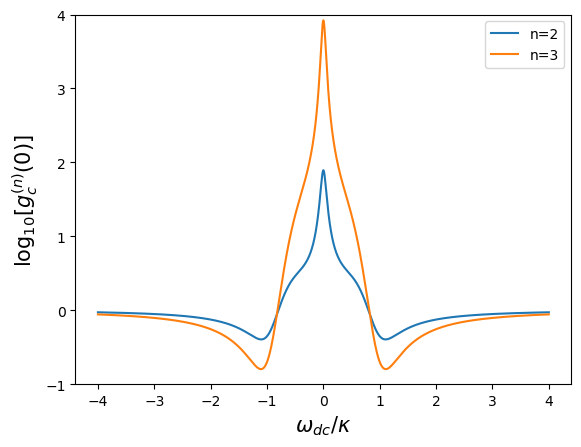

In [8]:
plt.plot(ω_dc, np.log10(g2_0_ana_c_ae),label='n=2')
plt.plot(ω_dc, np.log10(g3_0_ana_c_aae),label='n=3')
plt.ylim([-1, 4])
plt.xlabel("$\omega_{dc}/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}_c(0)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

### 2.The atom-driven case:
$$H_{d}^{(e)} = \Omega_e(\sigma e^{it\omega_{de}}+\text{h.c.}) $$

In [9]:
ω_de = np.linspace(-4, 4, 4000)
Input_e = qcs.Input_channel("b2", mode_e, ω_de)

In [10]:
result_2 = qcs(Heff, Input_e, Output)
g2_0_ana_e_ae = result_2.calculate_quantity("c1c2") # 2nd-order CCF
g3_0_ana_e_aae = result_2.calculate_quantity("c1c1c2") # 3rd-order CCF

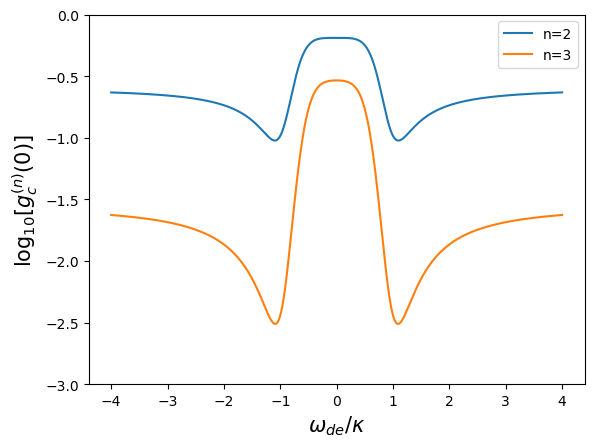

In [12]:
plt.plot(ω_de, np.log10(g2_0_ana_e_ae),label='n=2')
plt.plot(ω_de, np.log10(g3_0_ana_e_aae),label='n=3')
plt.ylim([-3, 0])
plt.xlabel("$\omega_{de}/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}_c(0)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

## The identical input and output channels

### Calculate 2nd-order and 3rd-order equal-time cross-correlation function
$$g^{(2)}(0)=\frac{\langle\psi_{\text{out}}| c_1^{\dagger }c_2^\dagger c_1c_2|\psi_{\text{out}}\rangle}{\langle \psi_{\text{out}}|c_1^{\dagger}c_1|\psi_{\text{out}}\rangle\langle \psi_{\text{out}}|c_2^{\dagger}c_2|\psi_{\text{out}}\rangle},\ \  g^{(3)}(0)=\frac{\langle\psi_{\text{out}}| c_1^{\dagger 2}c_2^\dagger c_1^2c_2|\psi_{\text{out}}\rangle}{\langle \psi_{\text{out}}|c_1^{\dagger}c_1|\psi_{\text{out}}\rangle^2\langle \psi_{\text{out}}|c_2^{\dagger}c_2|\psi_{\text{out}}\rangle},$$
where $c_{1,\text{out}}=c_{1,\text{in}}-i\sqrt{\kappa/2}a$ and $c_{2,\text{out}}=c_{2,\text{in}}-i\sqrt{\gamma/2}\sigma$. Note that $c_{1,\text{in}}\neq0$ and $c_{2,\text{in}}=0$.

In [13]:
mode_c = [np.sqrt(κ/2), ("a", 0)]
mode_e = [np.sqrt(γ/2), ("sm", 0)]

Output_c = qcs.Output_channel("c1", mode_c)
Output_e = qcs.Output_channel("c2", mode_e)
Output = [Output_c, Output_e]

### The single input case:
$$|\psi_{\text{in}}\rangle=|\beta\rangle_{\omega_d}^{c_1}\otimes|0\rangle_{\text{B}}\otimes|g\rangle,$$ 
where $\omega_d$ represents driving frequency, $\beta$ represents the coherent amplitude, and $c_1$ represents the input channel.

In [14]:
ω_d = np.linspace(-4, 4, 4000)
Input_1 = qcs.Input_channel("c1", mode_c, ω_d)

In [31]:
result_5 = qcs(Heff, Input_1, Output)
g2_0_ana_c1_c1c2 = result_5.calculate_quantity("c1c2") # 2nd-order ETCF
g3_0_ana_c1_c1c1c2 = result_5.calculate_quantity("c1c1c2") # 3rd-order ETCF

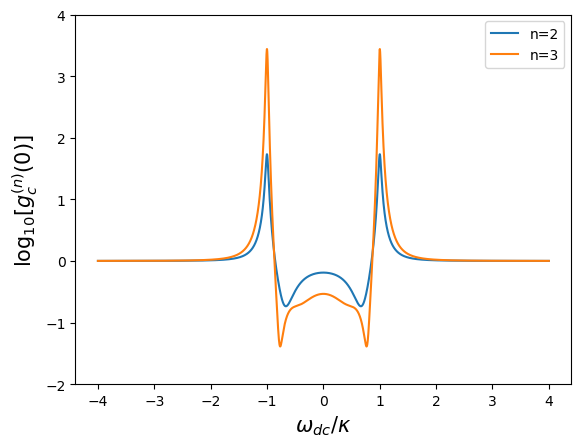

In [32]:
plt.plot(ω_d, np.log10(g2_0_ana_c1_c1c2),label='n=2')
plt.plot(ω_d, np.log10(g3_0_ana_c1_c1c1c2),label='n=3')
plt.ylim([-2, 4])
plt.xlabel("$\omega_{dc}/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}_c(0)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

# Numerical comparison by QuTip

In [18]:
N = 5 # cavity dimension

a = qt.tensor(qt.destroy(N), qt.qeye(2))
σ = qt.tensor(qt.qeye(N), qt.sigmam())

c_ops = [np.sqrt(κ) * a, np.sqrt(γ) * σ]

># The different input and output channels

## The cavity-driven and atom-driven cases

In [19]:
g2_0_num_c_ae = []
g3_0_num_c_aae = []
g2_0_num_e_ae = []
g3_0_num_e_aae = []

In [20]:
Ωc = 5e-3
Ωe = 5e-3

ωd_list = np.linspace(-4, 4, 4000)
for kk,ωd in enumerate(ωd_list):
    H_dc = (ωc-ωd) * (a.dag() * a) + (ωe-ωd) * (σ.dag() * σ) + g * (a.dag() * σ + σ.dag() * a) + Ωc * (a + a.dag())
    H_de = (ωc-ωd) * (a.dag() * a) + (ωe-ωd) * (σ.dag() * σ) + g * (a.dag() * σ + σ.dag() * a) + Ωe * (σ + σ.dag())
    rho1_ss = qt.steadystate(H_dc, c_ops)
    rho2_ss = qt.steadystate(H_de, c_ops)
    g2_0_num_c_ae.append(qt.expect(a.dag()*σ.dag()*a*σ,rho1_ss)/(qt.expect(a.dag()*a,rho1_ss)*qt.expect(σ.dag()*σ,rho1_ss)))
    g3_0_num_c_aae.append(qt.expect(a.dag()**2*σ.dag()*a**2*σ,rho1_ss)/(qt.expect(a.dag()*a,rho1_ss)**2*qt.expect(σ.dag()*σ,rho1_ss)))
    g2_0_num_e_ae.append(qt.expect(a.dag()*σ.dag()*a*σ,rho2_ss)/(qt.expect(a.dag()*a,rho2_ss)*qt.expect(σ.dag()*σ,rho2_ss)))
    g3_0_num_e_aae.append(qt.expect(a.dag()**2*σ.dag()*a**2*σ,rho2_ss)/(qt.expect(a.dag()*a,rho2_ss)**2*qt.expect(σ.dag()*σ,rho2_ss)))

### The cavity-driven comparison

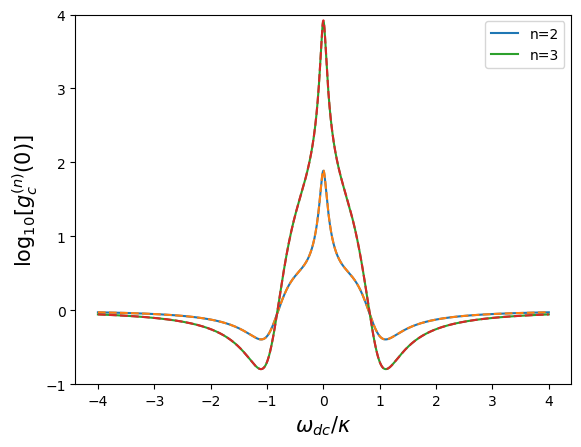

In [21]:
plt.plot(ωd_list, np.log10(g2_0_num_c_ae),label='n=2')
plt.plot(ωd_list, np.log10(g2_0_ana_c_ae), '--')
plt.plot(ωd_list, np.log10(g3_0_num_c_aae),label='n=3')
plt.plot(ωd_list, np.log10(g3_0_ana_c_aae), '--')
plt.ylim([-1, 4])
plt.xlabel("$\omega_{dc}/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}_c(0)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

### The atom-driven comparison

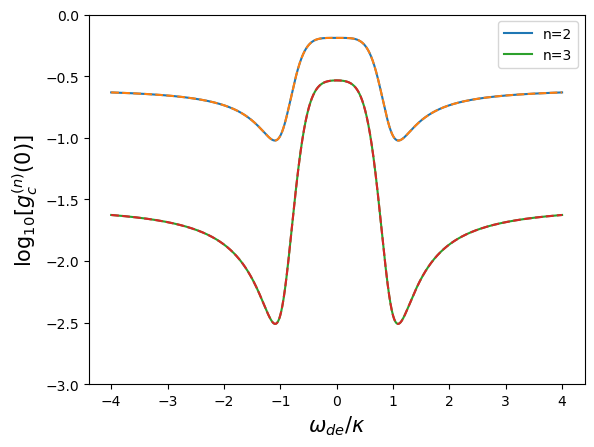

In [27]:
plt.plot(ωd_list, np.log10(g2_0_num_e_ae),label='n=2')
plt.plot(ωd_list, np.log10(g2_0_ana_e_ae), '--')
plt.plot(ωd_list, np.log10(g3_0_num_e_aae),label='n=3')
plt.plot(ωd_list, np.log10(g3_0_ana_e_aae), '--')
plt.ylim([-3, 0])
plt.xlabel("$\omega_{de}/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}_c(0)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

># The identical input and output channels

## The single input case

In [35]:
g2_0_num_c1_c1c2 = []
g3_0_num_c1_c1c1c2 = []

In [36]:
Ωc = 1e-2

c1 = np.sqrt(κ/2)*(Ωc/(κ/2)-1j*a)
c2 = np.sqrt(κ/2)*(0-1j*σ)

ωd_list = np.linspace(-4, 4, 4000)
for kk,ωd in enumerate(ωd_list):
    H_dc = (ωc-ωd) * (a.dag() * a) + (ωe-ωd) * (σ.dag() * σ) + g * (a.dag() * σ + σ.dag() * a) + Ωc * (a + a.dag())
    rho1_ss = qt.steadystate(H_dc, c_ops)
    g2_0_num_c1_c1c2.append(qt.expect(c1.dag()*c2.dag()*c1*c2,rho1_ss)/(qt.expect(c1.dag()*c1,rho1_ss)*qt.expect(c2.dag()*c2,rho1_ss)))
    g3_0_num_c1_c1c1c2.append(qt.expect(c1.dag()**2*c2.dag()*c1**2*c2,rho1_ss)/(qt.expect(c1.dag()*c1,rho1_ss)**2*qt.expect(c2.dag()*c2,rho1_ss)))

### The single input comparison

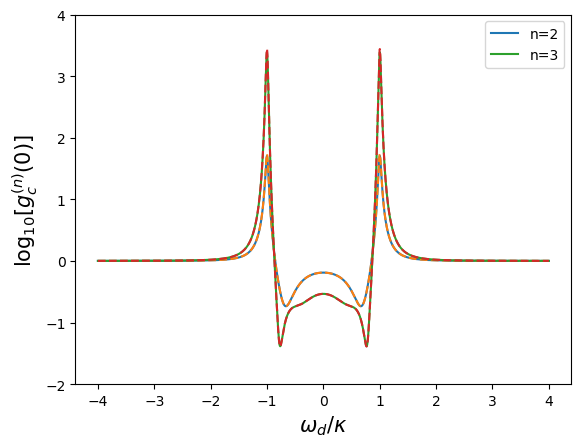

In [37]:
plt.plot(ωd_list, np.log10(g2_0_num_c1_c1c2),label='n=2')
plt.plot(ωd_list, np.log10(g2_0_ana_c1_c1c2), '--')
plt.plot(ωd_list, np.log10(g3_0_num_c1_c1c1c2),label='n=3')
plt.plot(ωd_list, np.log10(g3_0_ana_c1_c1c1c2), '--')
plt.ylim([-2, 4])
plt.xlabel("$\omega_{d}/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}_c(0)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()